In [1]:
import pandas as pd, numpy as np, glob
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.stats as ss, seaborn as sns
## Bring in more mods
from matplotlib.gridspec import GridSpec
plt.style.use(['tableau-colorblind10'])

def allelic_ANOVA(site, pheno):
    """
    This regression is equivalent to one-way ANOVA with 2 groups. Return F-statistic.
    Assumes site is coded as -1, 1
    """
    coding = np.array(site, np.float)
    pheno = np.array(pheno, np.float)
    
    meany = np.mean(pheno)
    meandummy = np.mean(coding)
    ctry = pheno - meany
    ctrdummy = coding - meandummy
    # regression coefficient and intercept
    b = np.dot(ctry, ctrdummy)/np.dot(ctrdummy, ctrdummy)
    intercept = meany - b * meandummy
    
    yhat = b * ctrdummy
    len_yhat = np.sqrt(np.dot(yhat,yhat))
    len_y = np.sqrt(np.dot(ctry,ctry))
    df_yhat = 1
    
    error = ctry  - yhat
    len_error = np.sqrt(np.dot(error,error))
    if abs(len_error**2) < 1e-5:
        raise Exception("Zero length error in ANOVA")
    df_error = len(pheno) - 2
    # coefficient of determination is R**2
    #R = len_yhat/len_y
    # F-statistic
    F = (len_yhat**2/df_yhat) / (len_error**2/df_error)
    return F

def association_logPval(site, pheno):
    F = allelic_ANOVA(site, pheno)
    logP = np.log10(ss.f.sf(F, 1, len(pheno)-2))
    return -logP

import shutil
p = '../../FILES/Capsule_Results/ADDED/'
new_file_paths = sorted(glob.glob(p +'*.csv')) 
print(len( new_file_paths))
oct4 = new_file_paths[:6]
oct11 = new_file_paths[6:]
for f in oct4:
    newfile = '_10-4_'.join(f.split('a-10-4-'))
    shutil.copyfile(f,''.join(newfile.split('ADDED/')))
for f in oct11:
    newfile = '_10-11_'.join(f.split('-10-11-'))
    shutil.copyfile(f,''.join(newfile.split('ADDED/')))

import shutil
new_file_dirs = ['../../FILES/Capsule_Results/10-18/','../../FILES/Capsule_Results/10-25/']
new_file_paths = [sorted(glob.glob(p+'*.csv')) for p in new_file_dirs]
[print(len(a)) for a in new_file_paths];
for i,j in enumerate(['10-18','10-25']):
    files = new_file_paths[i]
    for f in files:
        k = f.split('/')[-1]
        temp = k.split(j)
        newfile = '../../FILES/Capsule_Results/'+temp[0][:-1]+'_'+j+'_'+temp[-1][1:]
        shutil.copyfile(f,newfile)

In [2]:
## Bring in genotype data and find unique test loci
gv = pd.read_csv('../../FILES/CDx-ill-SNP-INDEL-df-104-blocked.csv');
loci = gv.Block.drop_duplicates().index

In [3]:
files = glob.glob('../../FILES/Capsule_Results/*csv')

In [4]:
file_names = [a.split('/')[-1] for a in files]

In [5]:
file_names[:3]

['SS-C029cor_11-22_19_0024_TRANS_results.csv',
 'SS-B886_10-18_19_0005_TRANS_results.csv',
 'SS-B564_m-d_0006_results.csv']

In [6]:
len(np.unique(file_names))

817

In [7]:
samples = np.unique([a.split('_')[0] for a in file_names])

In [8]:
len(np.unique(samples))

104

In [9]:
len(samples)

104

In [10]:
cor_names = []
for s in samples:
    if s[-3:] == 'cor':
        k = s[:-3]+'_cor'
    else:
        k = s
    cor_names.append(k)

In [11]:
len(np.unique(cor_names))

104

In [12]:
missing = [s for s in cor_names if s not in gv.columns]
if len(missing) > 0:
    print(missing)

In [13]:
seg_names = []
for a in file_names:
    s = a.split('_')[0]
    if s[-3:] == 'cor':
        k = s[:-3]+'_cor'
    else:
        k = s
    seg_names.append(k)

In [14]:
len(np.unique(seg_names))

104

In [15]:
gv[np.unique(seg_names)].shape

(92103, 104)

In [16]:
temp_dates = [''.join(a.split('_')[1:])[:5] for a in file_names ]

In [17]:
dates = []
for d in temp_dates:
    if d[0] == '0':
        dates.append('nd')
    elif d[0] == 'm':
        dates.append('nd')
    else:
        dates.append(d)

In [18]:
len(np.unique(dates))

13

In [19]:
file_data = pd.DataFrame([seg_names,file_names,files,dates]).T
file_data.columns = ['Sample','File','Path','Date']
file_data['Circles'] = [pd.read_csv(f).shape[0] for f in file_data.Path]
file_data.sort_values(['Sample','File','Path','Date'],inplace=True)
file_data.reset_index(drop=True,inplace=True)

In [20]:
file_data.Circles.unique()

array([15, 18,  9, 12,  6,  3])

In [21]:
file_data[(file_data.Sample=='SS-C029_cor')].Circles.unique()

array([3, 6, 9])

In [22]:
file_data[(file_data.Sample=='SS-C272')]

,Sample,File,Path,Date,Circles
786,SS-C272,SS-C272_11-22_19_0001_TRANS_results.csv,../../FILES/Capsule_Results/SS-C272_11-22_19_0...,11-22,6
787,SS-C272,SS-C272_11-22_19_0002_TRANS_results.csv,../../FILES/Capsule_Results/SS-C272_11-22_19_0...,11-22,3
788,SS-C272,SS-C272_11-22_19_0003_TRANS_results.csv,../../FILES/Capsule_Results/SS-C272_11-22_19_0...,11-22,3
789,SS-C272,SS-C272_11-22_19_0004_TRANS_results.csv,../../FILES/Capsule_Results/SS-C272_11-22_19_0...,11-22,3
790,SS-C272,SS-C272_11-22_19_0005_TRANS_results.csv,../../FILES/Capsule_Results/SS-C272_11-22_19_0...,11-22,3
791,SS-C272,SS-C272_11-22_19_0006_TRANS_results.csv,../../FILES/Capsule_Results/SS-C272_11-22_19_0...,11-22,3
792,SS-C272,SS-C272_11-22_19_0007_TRANS_results.csv,../../FILES/Capsule_Results/SS-C272_11-22_19_0...,11-22,3


In [23]:
file_data.shape

(817, 5)

In [24]:
import os

In [25]:
cell_reps = []
for i,j in file_data[(file_data.Circles>=15)].iterrows():
    temp = pd.read_csv(j['Path'],index_col=None)
    if temp.shape[0] < 15:
        continue
    Capsule = np.array(temp.T[np.arange(5,10,1)].T['Area'].values,dtype=float)
    Cell = np.array(temp.T[np.arange(10,15,1)].T['Area'].values,dtype=float)
    Annulus = Capsule - Cell
    Capsulediameter = 2*np.sqrt(Capsule/np.pi)
    Celldiameter = 2*np.sqrt(Cell/np.pi)
    Annulusdiameter = Capsulediameter-Celldiameter
    
    cell_rep = pd.DataFrame([Capsule,Cell,Annulus,
                             Capsulediameter,Celldiameter,
                             Annulusdiameter]).T
    cell_rep['Sample'] = j['Sample']
    cell_rep['File'] = j['File']
    cell_reps.append(cell_rep)

In [26]:
len(cell_reps)

765

In [27]:
type(cell_reps)

list

In [28]:
file_data[(file_data.Sample=='SS-C272')]

,Sample,File,Path,Date,Circles
786,SS-C272,SS-C272_11-22_19_0001_TRANS_results.csv,../../FILES/Capsule_Results/SS-C272_11-22_19_0...,11-22,6
787,SS-C272,SS-C272_11-22_19_0002_TRANS_results.csv,../../FILES/Capsule_Results/SS-C272_11-22_19_0...,11-22,3
788,SS-C272,SS-C272_11-22_19_0003_TRANS_results.csv,../../FILES/Capsule_Results/SS-C272_11-22_19_0...,11-22,3
789,SS-C272,SS-C272_11-22_19_0004_TRANS_results.csv,../../FILES/Capsule_Results/SS-C272_11-22_19_0...,11-22,3
790,SS-C272,SS-C272_11-22_19_0005_TRANS_results.csv,../../FILES/Capsule_Results/SS-C272_11-22_19_0...,11-22,3
791,SS-C272,SS-C272_11-22_19_0006_TRANS_results.csv,../../FILES/Capsule_Results/SS-C272_11-22_19_0...,11-22,3
792,SS-C272,SS-C272_11-22_19_0007_TRANS_results.csv,../../FILES/Capsule_Results/SS-C272_11-22_19_0...,11-22,3


In [29]:
cell_C272s = []
for i,j in file_data[(file_data.Sample.isin(['SS-C272','SS-C029_cor']))].iterrows():
    temp = pd.read_csv(j['Path'],index_col=None)
    
    if j.Circles == 3:
        Capsule = float(temp['Area'].values[1])
        Cell = float(temp['Area'].values[2])
    elif j.Circles == 6:
        Capsule = np.array(temp['Area'].values[2:4],dtype=float)
        Cell = np.array(temp['Area'].values[4:6],dtype=float)
    elif j.Circles == 9:
        Capsule = np.array(temp['Area'].values[3:6],dtype=float)
        Cell = np.array(temp['Area'].values[6:9],dtype=float)
    else:
        print('Error!')
    
    Annulus = Capsule - Cell
    Capsulediameter = 2*np.sqrt(Capsule/np.pi)
    Celldiameter = 2*np.sqrt(Cell/np.pi)
    Annulusdiameter = Capsulediameter-Celldiameter
    
    cell_C272 = pd.DataFrame([Capsule,Cell,Annulus,
                             Capsulediameter,Celldiameter,
                             Annulusdiameter]).T
    cell_C272['Sample'] = j['Sample']
    cell_C272['File'] = j['File']
    cell_C272s.append(cell_C272)

In [30]:
len(cell_C272s)

39

In [31]:
[cell_reps.append(c) for c in cell_C272s];

In [32]:
cell_data = pd.concat(cell_reps)
cell_data.columns = ['Cell_and_Capsule','Cell','Capsule',
                     'Cell_and_Capsule_diameter','Cell_diameter','Capsule_diameter',
                     'Sample','File']

In [33]:
cell_data.Sample.unique().shape

(104,)

In [34]:
data = cell_data.merge(file_data)

In [35]:
data.shape

(3880, 11)

In [36]:
data[(data.Sample=='SS-C272')].shape

(8, 11)

In [37]:
data[(data.Sample=='SS-C029_cor')].shape

(47, 11)

In [38]:
data.head()

,Cell_and_Capsule,Cell,Capsule,Cell_and_Capsule_diameter,Cell_diameter,Capsule_diameter,Sample,File,Path,Date,Circles
0,3015.0,1052.0,1963.0,61.958189,36.598470,25.359719,SS-A837,SS-A837_7-12_0001_TRANS_results.csv,../../FILES/Capsule_Results/SS-A837_7-12_0001_...,7-120,15
1,4128.0,1422.0,2706.0,72.497813,42.550519,29.947294,SS-A837,SS-A837_7-12_0001_TRANS_results.csv,../../FILES/Capsule_Results/SS-A837_7-12_0001_...,7-120,15
2,3024.0,1292.0,1732.0,62.050595,40.558914,21.491682,SS-A837,SS-A837_7-12_0001_TRANS_results.csv,../../FILES/Capsule_Results/SS-A837_7-12_0001_...,7-120,15
3,6512.0,1976.0,4536.0,91.056773,50.158961,40.897812,SS-A837,SS-A837_7-12_0001_TRANS_results.csv,../../FILES/Capsule_Results/SS-A837_7-12_0001_...,7-120,15
4,2686.0,1085.0,1601.0,58.480094,37.168063,21.312031,SS-A837,SS-A837_7-12_0001_TRANS_results.csv,../../FILES/Capsule_Results/SS-A837_7-12_0001_...,7-120,15


(array([ 4.,  0., 76.,  0.,  1.,  1., 16.,  1.,  1.,  4.]),
 array([ 8. , 16.2, 24.4, 32.6, 40.8, 49. , 57.2, 65.4, 73.6, 81.8, 90. ]),
 <a list of 10 Patch objects>)

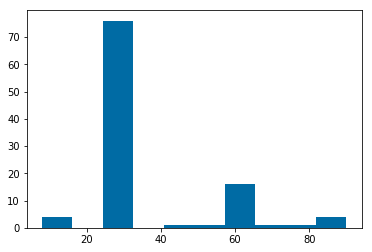

In [45]:
plt.hist([data[(data.Sample==s)].shape[0] for s in data.Sample.unique()])

In [39]:
[s for s in np.unique(seg_names) if s not in data.Sample.values]

[]

In [40]:
dg = data.groupby(['File','Sample','Date']).agg('median').reset_index()

In [41]:
dg.shape

(804, 10)

In [42]:
dgg = dg.groupby(['Sample','Date']).agg('median').reset_index()

In [43]:
dgg.shape

(123, 9)

In [44]:
dgg[(dgg.Sample=='SS-C272')]

,Sample,Date,Cell_and_Capsule,Cell,Capsule,Cell_and_Capsule_diameter,Cell_diameter,Capsule_diameter,Circles
118,SS-C272,11-22,3125.0,988.0,2137.0,63.078313,35.467741,27.610572,3


In [45]:
sample_date_counts = dgg.groupby('Sample').count()[['Date']]
dup_samp = sample_date_counts[(sample_date_counts.Date>1)].index.tolist()

In [46]:
len(dup_samp)

19

In [47]:
duplicated_data = dgg[(dgg.Sample.isin(dup_samp))].copy()

In [48]:
duplicated_data.head()

,Sample,Date,Cell_and_Capsule,Cell,Capsule,Cell_and_Capsule_diameter,Cell_diameter,Capsule_diameter,Circles
11,SS-B354,10-18,3292.0,1372.5,1978.5,64.741400,41.802415,23.535668,15
12,SS-B354,7-120,3097.5,1123.5,1902.5,62.799536,37.816194,24.071503,15
13,SS-B356,10-25,1701.0,871.5,806.0,46.526630,33.302524,12.768762,15
14,SS-B356,7-120,2556.0,796.0,1656.0,57.038895,31.833886,23.732053,15
24,SS-B378,10-25,1591.0,804.5,723.0,45.005322,31.985950,12.059095,15


In [49]:
duplicated_data.Sample.unique().shape[0]

19

In [50]:
dropmetoo = list([duplicated_data[(duplicated_data.Sample=='SS-B575') & 
                            (duplicated_data.Date!='10-11')].index[0], 
                  duplicated_data[(duplicated_data.Sample=='SS-B564') & 
                (duplicated_data.Date=='nd')].index[0]])

In [51]:
dropmetoo

[47, 41]

In [52]:
duplicated_data[(duplicated_data.Date.isin(['10-18','10-25']))].Sample.unique().shape[0]

17

In [53]:
dup_to_drop = duplicated_data[(duplicated_data.Date.isin(['10-18','10-25']))].index.tolist() + dropmetoo

In [54]:
dup_to_drop

[11, 13, 24, 27, 31, 34, 60, 62, 70, 73, 76, 85, 91, 93, 98, 101, 116, 47, 41]

In [55]:
dgg.drop(dup_to_drop,inplace=True)

In [56]:
dgg.shape

(104, 9)

In [177]:
dgg.shape

(104, 11)

In [179]:
#dgg.to_csv('../../FILECS/Cdeneoformans_capsule_phenotypes.csv',index=True);

In [57]:
import statsmodels.formula.api as smf

In [180]:
dgg.head()

,Sample,Date,Cell_and_Capsule,Cell,Capsule,Cell_and_Capsule_diameter,Cell_diameter,Capsule_diameter,Circles,Residual,QTL
Sample,,,,,,,,,,,
SS-A837,SS-A837,7-120,2954.0,1093.0,1935.5,61.323907,37.304177,25.117309,15,2.144624,1
SS-B307,SS-B307,7-120,3015.0,831.0,2065.5,61.958189,32.512533,26.994920,15,3.635013,1
SS-B310,SS-B310,7-120,6371.0,2168.0,3964.5,90.064104,52.517844,34.967517,15,-5.550718,0
SS-B311,SS-B311,7-150,3293.5,1023.5,2096.5,64.756295,36.099316,26.319158,15,1.251042,1
SS-B312,SS-B312,11-22,7008.5,1610.0,5398.5,94.452263,45.269625,47.179251,15,3.982097,0


In [195]:
dgg.head()

,Sample,Date,Cell_and_Capsule,Cell,Capsule,Cell_and_Capsule_diameter,Cell_diameter,Capsule_diameter,Circles,Residual,QTL,QTL142
Sample,,,,,,,,,,,,
SS-A837,SS-A837,7-120,2954.0,1093.0,1935.5,61.323907,37.304177,25.117309,15,2.144624,1,1.0
SS-B307,SS-B307,7-120,3015.0,831.0,2065.5,61.958189,32.512533,26.994920,15,3.635013,1,1.0
SS-B310,SS-B310,7-120,6371.0,2168.0,3964.5,90.064104,52.517844,34.967517,15,-5.550718,0,1.0
SS-B311,SS-B311,7-150,3293.5,1023.5,2096.5,64.756295,36.099316,26.319158,15,1.251042,1,1.0
SS-B312,SS-B312,11-22,7008.5,1610.0,5398.5,94.452263,45.269625,47.179251,15,3.982097,0,0.0


In [200]:
mod = smf.ols('Cell_diameter ~ QTL2 + QTL142',data=dgg)
res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Cell_diameter   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     19.11
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           9.14e-08
Time:                        20:13:03   Log-Likelihood:                -338.37
No. Observations:                 104   AIC:                             682.7
Df Residuals:                     101   BIC:                             690.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.3008      0.973     41.407      0.000      38.370      42.232
QTL2          -6.0056      1.340     -4.480      0.000      -8.665      -3.347
QTL142         5.5836      1.248      4.474      0.000       3.108       8.059
==============================================================================
Omnibus:                        3.075   Durbin-Watson:                   2.348
Prob(Omnibus):                  0.215   Jarque-Bera (JB):                3.038
Skew:                           0.408   Prob(JB):                        0.219
Kurtosis:                       2.812   Cond. No.                         2.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
assert dgg.Sample.unique().shape[0] == dgg.shape[0]

In [59]:
dgg.head()

,Sample,Date,Cell_and_Capsule,Cell,Capsule,Cell_and_Capsule_diameter,Cell_diameter,Capsule_diameter,Circles
0,SS-A837,7-120,2954.0,1093.0,1935.5,61.323907,37.304177,25.117309,15
1,SS-B307,7-120,3015.0,831.0,2065.5,61.958189,32.512533,26.994920,15
2,SS-B310,7-120,6371.0,2168.0,3964.5,90.064104,52.517844,34.967517,15
3,SS-B311,7-150,3293.5,1023.5,2096.5,64.756295,36.099316,26.319158,15
4,SS-B312,11-22,7008.5,1610.0,5398.5,94.452263,45.269625,47.179251,15


In [60]:
dgg.Sample.unique().shape

(104,)

In [61]:
mod = smf.ols('Capsule_diameter ~ Cell_and_Capsule_diameter',data=dgg)
res = mod.fit()
h = res.rsquared
dgg['Residual'] = res.resid
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Capsule_diameter   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     828.7
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           8.93e-51
Time:                        19:54:50   Log-Likelihood:                -283.42
No. Observations:                 104   AIC:                             570.8
Df Residuals:                     102   BIC:                             576.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -14.4648      1.508     -9.589      0.000     -17.457     -11.473
Cell_and_Capsule_diameter     0.6105      0.021     28.787      0.000       0.568       0.653
==============================================================================
Omnibus:                        0.228   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.892   Jarque-Bera (JB):                0.408
Skew:                           0.035   Prob(JB):                        0.816
Kurtosis:                       2.701   Cond. No.                         294.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
cell_diam_res_r = np.round(res.rsquared,2)
cell_diam_res_r

0.89

In [63]:
loci.shape

(3108,)

In [64]:
dgg.Sample.unique().shape

(104,)

In [65]:
dgg.shape

(104, 10)

In [66]:
dgg.index = dgg.Sample

In [67]:
dgg.Sample.unique().shape

(104,)

In [164]:
## conduct QTL mapping
test = gv[dgg.Sample.unique()].drop_duplicates()

test['Residual'] = test.apply(association_logPval,
                             args=[dgg.T[dgg.Sample.unique()
                                   ].T['Residual']],axis=1)
pval_df = gv.merge(test)

In [165]:
pval_df.shape

(92103, 126)

In [166]:
pval_df.head()

,Chrom,Pos,Qual,Callrate,Ref,Alt,Altlen,Dp,Type,Vcfix,...,SS-B565,SS-B600,SS-B574,SS-B872_cor,SS-B873_cor,SS-B360,SS-B397,SS-B564,SS-B382,Residual
0,Chr01,5016,104492.0,1.0,C,A,1,6510,snp,289,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.32446
1,Chr01,5299,112647.0,1.0,T,C,1,9711,snp,293,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.32446
2,Chr01,5464,112658.0,1.0,T,C,1,9375,snp,294,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.32446
3,Chr01,6120,109003.0,1.0,T,C,1,9311,snp,311,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.32446
4,Chr01,6166,114638.0,1.0,G,A,1,9269,snp,312,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.32446


In [71]:
## find unique chromosomes, lengths, and midpoints. 
chrlist = sorted(pval_df.Chrom.unique())
chrlens = np.array([pval_df[(pval_df.Chrom==c)].Pos.max() 
           for c in chrlist])
cumpos = np.array([0] + list(np.cumsum(chrlens[:-1])))
cummax = cumpos[-1] + pval_df[(pval_df.Chrom=='Chr14')].Pos.max()
chrmid = (chrlens/2) + cumpos
assert len(chrlist) == 14

In [72]:
residual_threshold = 4.1267

In [73]:
mito = pd.read_csv('../../FILES/Cdx-mitochondiral.csv')
mito['XL280a'] = 0
mito['XL280alpha'] = 0

In [74]:
clonedf = pd.read_csv('/Users/croth/Desktop/CRYPTO_QTL/FILES/Cdx_Clones.csv')

In [75]:
median_mito = pd.DataFrame(mito[cor_names].median(axis=0)).T

In [76]:
median_mito

,SS-A837,SS-B307,SS-B310,SS-B311,SS-B312,SS-B313,SS-B314,SS-B315,SS-B316,SS-B317,...,SS-C033,SS-C036,SS-C039,SS-C242,SS-C271,SS-C272,SS-C290,SS-C291,XL280a,XL280alpha
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
median_mito[dgg.Sample.unique()].apply(
    association_logPval,args=[dgg.T[dgg.Sample.unique()
                                   ].T['Residual']],axis=1)

0    0.159146
dtype: float64

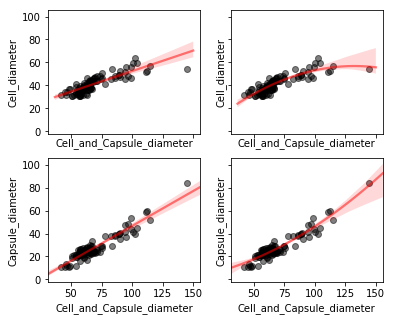

In [78]:
fig,ax=plt.subplots(2,2,figsize=(6,5),sharey=True,sharex='col')
plt.sca(ax[0,0])
x = 'Cell_and_Capsule_diameter'
y = 'Cell_diameter'
sns.regplot(x=x,y=y,
           data=dgg,order=1,
           line_kws={'color':'red','alpha':.5}, 
           scatter_kws={'color':'k','alpha':0.5});

plt.sca(ax[0,1])
sns.regplot(x=x,y=y,
           data=dgg,order=2,
           line_kws={'color':'red','alpha':.5}, 
           scatter_kws={'color':'k','alpha':0.5});


plt.sca(ax[1,0]);
x = 'Cell_and_Capsule_diameter'
y = 'Capsule_diameter'
sns.regplot(x=x,y=y,
           data=dgg,order=1,
           line_kws={'color':'red','alpha':.5}, 
           scatter_kws={'color':'k','alpha':0.5});

plt.sca(ax[1,1]);
sns.regplot(x=x,y=y,
           data=dgg,order=2,
           line_kws={'color':'red','alpha':.5}, 
           scatter_kws={'color':'k','alpha':0.5});
plt.subplots_adjust(wspace=0.2);

In [79]:
dgg[(dgg.Capsule_diameter>75)]

,Sample,Date,Cell_and_Capsule,Cell,Capsule,Cell_and_Capsule_diameter,Cell_diameter,Capsule_diameter,Circles,Residual
Sample,,,,,,,,,,
SS-B364,SS-B364,nd,16556.5,2292.0,14235.0,144.75283,53.960829,84.486981,15,10.581925


In [80]:
dgg[(dgg.Capsule_diameter == dgg.Capsule_diameter.max())]

,Sample,Date,Cell_and_Capsule,Cell,Capsule,Cell_and_Capsule_diameter,Cell_diameter,Capsule_diameter,Circles,Residual
Sample,,,,,,,,,,
SS-B364,SS-B364,nd,16556.5,2292.0,14235.0,144.75283,53.960829,84.486981,15,10.581925


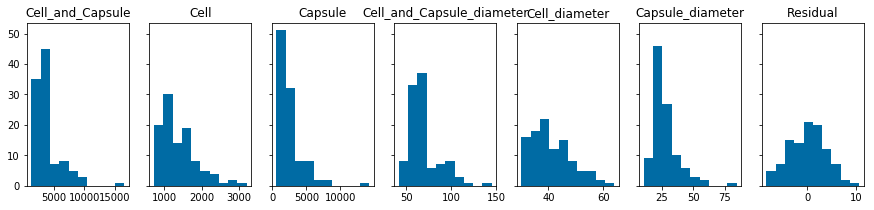

In [81]:
phenos = dgg.columns.tolist()[2:-2] + [dgg.columns.tolist()[-1]]
fig,ax = plt.subplots(1,len(phenos),
                      figsize=(15,3),sharey=True);
for i,p in enumerate(phenos):
    plt.sca(ax[i]);
    plt.title(p)
    plt.hist(dgg[p].values);

In [82]:
cell_diameter_threshold = 4.0653
residual_threshold = 4.1267

In [83]:
needed = [s for s in gv.columns[gv.columns.tolist().index('Block')+1:] if s not in dgg.Sample.unique()]

In [84]:
needed

[]

In [85]:
ch14_temp = pval_df[(pval_df.Chrom=='Chr14')].copy()

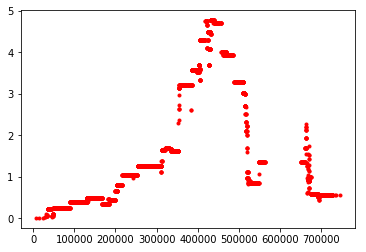

In [86]:
#plt.plot(ch14_temp.Pos,ch14_temp.Cell,'k.');
plt.plot(ch14_temp.Pos,ch14_temp.Residual,'r.');

In [87]:
pheno_path = '/Users/croth/Desktop/CRYPTO_RECOMB/FILES/CRNE_Progeny_QTL_Phenotyping_All_20150226_Renamed.xlsx'
pheno_df = pd.read_excel(pheno_path)
pheno_df.columns = ['Strain','ypd30','ypd37','ypd40','ypd41','ypd42',
                    'Ldopa','Ms','Fluc','Amph','Ph']

In [88]:
fluc = pheno_df[(pheno_df.Strain.isin(gv.columns))][['Strain','Fluc']].copy()
fluc.index = fluc.Strain
fluc.columns = ['Sample','Fluc']

In [89]:
fluc_segs = [s for s  in gv.columns if s in fluc.Sample]
len(fluc_segs)

95

In [90]:
fluc_pval = gv.T[loci].T[fluc_segs].apply(association_logPval,
                                      args=[fluc['Fluc'][fluc_segs]],
                                         axis=1)

In [91]:
len(fluc_pval)

3108

In [92]:
pval_df['Fluc'] = fluc_pval

In [93]:
pval_df.head()

,Chrom,Pos,Qual,Callrate,Ref,Alt,Altlen,Dp,Type,Vcfix,...,SS-B600,SS-B574,SS-B872_cor,SS-B873_cor,SS-B360,SS-B397,SS-B564,SS-B382,Residual,Fluc
0,Chr01,5016,104492.0,1.0,C,A,1,6510,snp,289,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.32446,1.13846
1,Chr01,5299,112647.0,1.0,T,C,1,9711,snp,293,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.32446,NaN
2,Chr01,5464,112658.0,1.0,T,C,1,9375,snp,294,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.32446,NaN
3,Chr01,6120,109003.0,1.0,T,C,1,9311,snp,311,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.32446,NaN
4,Chr01,6166,114638.0,1.0,G,A,1,9269,snp,312,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.32446,NaN


In [94]:
#Melpvals = pd.read_csv('/Users/croth/Downloads/Melanin_QTL_pvalues.csv',index_col=0)
#MelQTL = pd.read_csv('/Users/croth/Downloads/Melanin_QTL_Genotype_phenotype.csv')
Melanin = pd.read_csv('../../FILES/Melanin_Phenotypes.csv',index_col=0)
ric8 = pd.read_csv('../../FILES/Chr14/CNN01270.csv',index_col=0)
gff = pd.read_csv('../../FILES/xl280genome.gff3.csv.gz',index_col=0)

In [95]:
Melanin.head()

,QTL,MC
strain,,
SS-B357,0.0,17455.744000
SS-B360,1.0,13758.783333
SS-B364,0.0,5925.816000
SS-B366,0.0,17842.346000
SS-B368,0.0,19223.485333


In [162]:
## conduct QTL mapping
test = gv[dgg.Sample.unique()].drop_duplicates()

test['Mel'] = test.apply(association_logPval,
                             args=[Melanin.T[dgg.Sample.unique()
                                   ].T['MC']],axis=1)
pval_df = pval_df.merge(test)

In [163]:
pval_df.head()

,Chrom,Pos,Qual,Callrate,Ref,Alt,Altlen,Dp,Type,Vcfix,...,SS-C036,SS-C039,SS-C242,SS-C271,SS-C272,SS-C290,SS-C291,XL280a,XL280alpha,Mel


In [98]:
ci95_mel = np.array([368955, 403449])# (354015,403043)
ci95_res = np.array([354579, 667688.05]) # (354015,431009)

In [99]:
ric8.Start.min(),ric8.End.max()

(386833, 389698)

plt.plot(pval_df[(pval_df.Chrom=='Chr14')]['Pos'],
         pval_df[(pval_df.Chrom=='Chr14')]['Residual'].values/pval_df[
             (pval_df.Chrom=='Chr14')]['Residual'].max(),'ro',
         alpha=0.5,label='Capsual Residual QTL');

plt.plot(Melpvals[(Melpvals.Chrom=='Chr14')]['Pos'],
        Melpvals[(Melpvals.Chrom=='Chr14')]['mc'].values/Melpvals[
            (Melpvals.Chrom=='Chr14')]['mc'].max(),'ko',
         alpha=0.5,label='Melanin QTL');
plt.vlines((ric8.Start.min(),ric8.End.max()),0,1,
           color='grey',linestyle='--',label='$RIC8$')
plt.fill_between(ci95_res,[1,1],color='tab:orange',alpha=0.42,label='95% CI Capsual QTL')
#plt.vlines(gff[(gff.gene=='CNN01400') & (gff.type=='gene')][['start',
#                'end']].values[0],
#          0,1,color='red',linestyle='--')
plt.legend(bbox_to_anchor=(0.63,1.45),fontsize=14);
plt.xlabel('Chromosome 14 Coordinates (bp)',fontsize=14);
plt.ylabel('Normalized\n$-log_{10}(p-value)$',fontsize=14);
plt.savefig('/Users/croth/Desktop/DISFIGS/ch3/Melanin_Capsual_qtl.png',
           dpi=100,bbox_inches='tight');

In [100]:
ch14 = pval_df[(pval_df.Chrom=='Chr14')]
ch14.shape

(3498, 128)

In [101]:
dgg.shape

(104, 10)

In [102]:
ch14_peak_ix = ch14.Residual.idxmax()

In [103]:
dgg['QTL'] = gv.T[ch14_peak_ix].T[dgg.Sample.tolist()]

In [104]:
from matplotlib import rc
xl280al = 'XL280'+r'$\alpha$'#+'SS'
xl280_label = 'XL280' +r'$\bf{a}$'
_431_label = '431'+r'$\mathrm{\alpha}$'

In [105]:
def myminmax(x):
    x = np.array(x)
    return (x-x.min())/(x.max()-x.min())

In [106]:
kb = 1000

In [107]:
mod_res = smf.ols('Residual ~ QTL',data=dgg).fit()
cap_res_r = np.round(mod_res.rsquared,2)

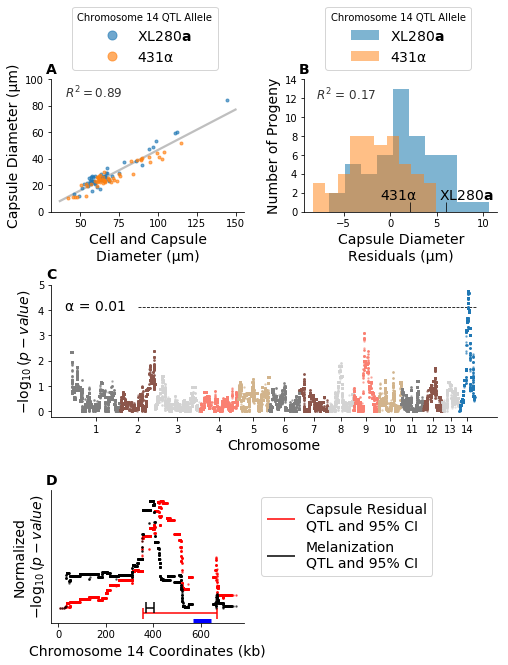

In [108]:
residual_threshold = 4.1267
fig = plt.figure(figsize=(8,10))
gs = fig.add_gridspec(3,4)

ax1 = fig.add_subplot(gs[0, :2])
ax2 = fig.add_subplot(gs[0,2:])
ax3 = fig.add_subplot(gs[1,:])
ax4 = fig.add_subplot(gs[2,:2])

plt.sca(ax1)
[ax1.spines[a].set_visible(False) for a in ['top','right']]
plt.title(label='A',fontweight='bold',fontsize=14,x=0,y=1)
x = 'Cell_and_Capsule_diameter'
y = 'Capsule_diameter'
plt.text(40,90,'$R^2 = %s$'%cell_diam_res_r,fontsize=12,
         color='k',va='center',alpha=.8)
sns.regplot(x=x,y=y,
           data=dgg,order=1,
            ci=False,
           line_kws={'color':'k','alpha':.25}, 
           scatter_kws={'color':'k','alpha':0.0});

plt.plot(dgg[(dgg.QTL==0)][x].values,
         dgg[(dgg.QTL==0)][y].values,'.',
         color='tab:blue',alpha=0.64,label=xl280_label)

plt.plot(dgg[(dgg.QTL==1)][x].values,
         dgg[(dgg.QTL==1)][y].values,'.',
         color='tab:orange',alpha=0.64,label=_431_label)

plt.legend(title='Chromosome 14 QTL Allele',markerscale=3.0,
           fontsize=14, bbox_to_anchor=(0.9,1.6))

plt.ylabel('Capsule Diameter (\u03BCm)',fontsize=14)
plt.xlabel('Cell and Capsule\nDiameter (\u03BCm)',fontsize=14)
plt.yticks(np.arange(0,120,20))    

plt.sca(ax2)
plt.title(label='B',fontweight='bold',fontsize=14,x=0,y=1)

for i, a in enumerate(dgg.groupby('QTL')):
    
    plt.hist(a[1].Residual,alpha=0.5,bins=10,
    label=xl280_label if i == 0 else _431_label);

plt.vlines(dgg.T[['XL280a','SS-A837']].T.Residual,
           0,1,color='k',linewidth=1,alpha=0.75);
plt.text(x=dgg.T['SS-A837'].T.Residual+0.75,y=1,
         s=_431_label,fontsize=14,va='bottom',ha='right')
plt.text(x=dgg.T['XL280a'].T.Residual-0.75,y=1,
         s=xl280_label,fontsize=14,va='bottom',ha='left');
plt.xlabel('Capsule Diameter\nResiduals (\u03BCm)',fontsize=14);
plt.ylabel('Number of Progeny',fontsize=14);
plt.yticks(np.arange(0,16,2))
plt.legend(title='Chromosome 14 QTL Allele',
           fontsize=14, bbox_to_anchor=(0.9,1.6))
[ax2.spines[a].set_visible(False) for a in ['top','right']]
plt.text(-1.5,12.4,s='$R^2$ = %s'%cap_res_r,va='center',
         ha='right',fontsize=12,
         color='k',alpha=.8)

###### ----------------------------------------------------------- ######
chrom_colors = ['tab:grey','tab:brown','lightgrey','salmon','tan']
plt.sca(ax3)
[ax3.spines[a].set_visible(False) for a in ['top','right']]
plt.title(label='C',fontweight='bold',fontsize=14,x=0,y=1)
for c in chrlist:
    i = int(c[-2:]) -1
    if c == 'Chr14':
        cc = 'tab:blue'
    else:
        cc = chrom_colors[i%len(chrom_colors)]
    temp = pval_df[(pval_df.Chrom==c)]
    plt.plot(temp.Pos.values+cumpos[i],
             temp.Residual.values,
             '.',alpha=0.5,markersize=3,color=cc);
plt.hlines(residual_threshold,chrmid[1],19*(10**6),linestyle='--',
           linewidth=0.8)#,label='\u03B1 = 0.01')
plt.xticks(chrmid,[int(a[-2:]) for a in chrlist]);
plt.ylabel('$-\log_{10}\,(p-value)$',fontsize=14);
plt.xlabel('Chromosome',fontsize=14)
plt.text(x=chrmid[0],y=residual_threshold ,s='\u03B1 = 0.01',
         va='center',ha='center',fontsize=14)
         #transform=ax3.transAxes)
    
    
###### ----------------------- Capsule and Melanin QTL overlap plot -------------------- #######    
plt.sca(ax4)
plt.title(label='D',fontweight='bold',fontsize=14,x=0,y=1)

[ax4.spines[a].set_visible(False) for a in ['top','right']]
kb = 1000
yp = -0.05
ls = 0.05
plt.plot(ch14.Pos.values/kb,myminmax(ch14.Residual.values),
         'r.',alpha=0.5,markersize=3)
plt.hlines(yp,*ci95_res/kb,color='r', label='Capsule Residual\nQTL and 95% CI');
plt.vlines(ci95_res/kb,yp-ls,yp+ls,color='r');

plt.plot(ch14.Pos.values/kb,myminmax(ch14.Mel.values),
         'k.',alpha=0.5,markersize=3)
plt.hlines(yp+0.05,*ci95_mel/kb,color='k',label='Melanization\nQTL and 95% CI');
plt.vlines(ci95_mel/kb ,yp+0.05-ls,yp+0.05+ls,color='k');#

plt.hlines(-0.13,568029/kb,644419/kb,color='blue',linewidth=7);     
plt.ylim(-0.14,1.1)
plt.yticks([])
plt.legend(bbox_to_anchor=(1.05,1),fontsize=14);
plt.xlabel('Chromosome 14 Coordinates (kb)',fontsize=14);
#plt.ylabel('\n$-log_{10}(p-value)$',fontsize=14);
plt.ylabel('Normalized\n$-\log_{10}\,(p-value)$',fontsize=14);

plt.subplots_adjust(wspace=0.9,hspace=0.55)
plt.savefig('/Users/croth/Desktop/CRYPTO_QTL/FIGURES/Capsule_Residual_QTL.png',
           dpi=200,bbox_inches='tight');

In [142]:
ss.normaltest(dgg.Cell_diameter.values)

NormaltestResult(statistic=8.213004117023896, pvalue=0.016465268458116793)

In [143]:
ss.shapiro(dgg.Cell_diameter.values)

(0.9558315277099609, 0.00159282679669559)

In [144]:
ss.normaltest(np.log(dgg.Cell_diameter.values))

NormaltestResult(statistic=3.1206735900164344, pvalue=0.21006531033755968)

In [176]:
ss.shapiro(np.log(dgg.Cell_diameter.values))

(0.9783492088317871, 0.08625141531229019)

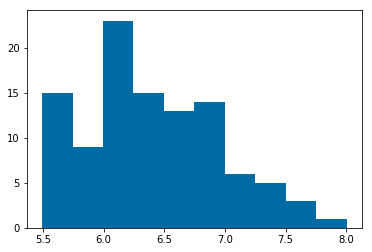

In [170]:
plt.hist(np.sqrt(dgg.Cell_diameter.values));

In [167]:
## conduct QTL mapping
test = gv[dgg.Sample.unique()].drop_duplicates()

test['Cell_size'] = test.apply(association_logPval,
                             args=[np.log(np.array(dgg.T[dgg.Sample.unique()].T['Cell'].values,float)) ],axis=1)
pval_df = pval_df.merge(test)

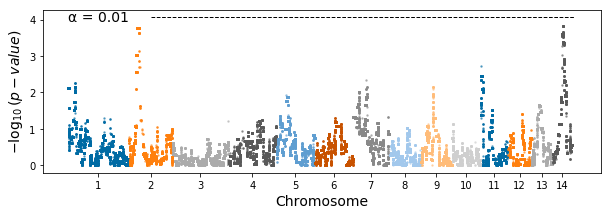

In [168]:
#plt.title(label='C',fontweight='bold',fontsize=14,x=0,y=1)
fig,ax=plt.subplots(1,1,figsize=(10,3))
for i,c in enumerate(chrlist):
    
    temp = pval_df[(pval_df.Chrom==c)]
    plt.plot(temp.Pos.values+cumpos[i],
             temp.Cell_size.values,
             '.',alpha=0.5,markersize=3);
plt.hlines(cell_diameter_threshold,chrmid[1],19*(10**6),linestyle='--',
           linewidth=1)#,label='\u03B1 = 0.01')
plt.xticks(chrmid,[int(a[-2:]) for a in chrlist]);
plt.ylabel('$-\log_{10}\,(p-value)$',fontsize=14);
plt.xlabel('Chromosome',fontsize=14)
plt.text(x=chrmid[0],y=cell_diameter_threshold ,s='\u03B1 = 0.01',
         va='center',ha='center',fontsize=14);

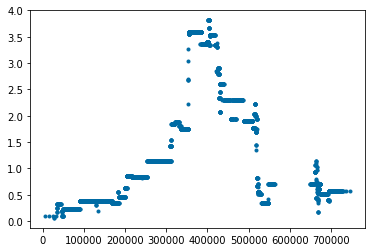

In [204]:
plt.plot(pval_df[(pval_df.Chrom=='Chr14')].Pos.values,
         pval_df[(pval_df.Chrom=='Chr14')].Cell_size.values,'.');

In [197]:
dgg['QTL2'] = pval_df[dgg.index].T[pval_df[(pval_df.Chrom=='Chr02')]['Cell_size'].idxmax()]

In [194]:
dgg['QTL142'] = pval_df[dgg.index].T[pval_df[(pval_df.Chrom=='Chr14')]['Cell_size'].idxmax()]

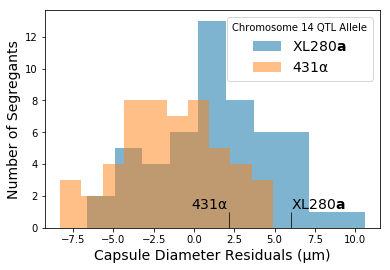

In [133]:
fig,ax = plt.subplots(1,1,figsize=(6,4))

for i, a in enumerate(dgg.groupby('QTL')):
    
    plt.hist(a[1].Residual,alpha=0.5,bins=10,
    label=xl280_label if i == 0 else _431_label);
plt.legend(title='Chromosome 14 QTL Allele',fontsize=14)
plt.vlines(dgg.T[['XL280a','SS-A837']].T.Residual,
           0,1,color='k',linewidth=1,alpha=0.75);
plt.text(x=dgg.T['SS-A837'].T.Residual,y=1,
         s=_431_label,fontsize=14,va='bottom',ha='right')
plt.text(x=dgg.T['XL280a'].T.Residual,y=1,
         s=xl280_label,fontsize=14,va='bottom',ha='left');
plt.xlabel('Capsule Diameter Residuals (\u03BCm)',fontsize=14);
plt.ylabel('Number of Segregants',fontsize=14);
plt.savefig('/Users/croth/Desktop/DISFIGS/ch4/Cdx_Annulus_Residuals.png',
           dpi=150,bbox_inches='tight');

In [ ]:
assert 1 == 0

In [113]:
dgg.head()

,Sample,Date,Cell_and_Capsule,Cell,Capsule,Cell_and_Capsule_diameter,Cell_diameter,Capsule_diameter,Circles,Residual,QTL
Sample,,,,,,,,,,,
SS-A837,SS-A837,7-120,2954.0,1093.0,1935.5,61.323907,37.304177,25.117309,15,2.144624,1
SS-B307,SS-B307,7-120,3015.0,831.0,2065.5,61.958189,32.512533,26.994920,15,3.635013,1
SS-B310,SS-B310,7-120,6371.0,2168.0,3964.5,90.064104,52.517844,34.967517,15,-5.550718,0
SS-B311,SS-B311,7-150,3293.5,1023.5,2096.5,64.756295,36.099316,26.319158,15,1.251042,1
SS-B312,SS-B312,11-22,7008.5,1610.0,5398.5,94.452263,45.269625,47.179251,15,3.982097,0


In [141]:
ci95_res[0]

354579.0

In [124]:
myminmax(ch14p.Residual.values)

array([0.        , 0.00491242, 0.0212766 , 0.01189648, 0.01398788,
       0.0440447 , 0.00331577, 0.00912535, 0.02053639, 0.05003091,
       0.08102179, 0.07964014, 0.09858234, 0.09858234, 0.08390609,
       0.07282688, 0.07282688, 0.09577498, 0.08899535, 0.13561493,
       0.16435075, 0.21806795, 0.21806795, 0.20380776, 0.26059321,
       0.26091444, 0.26091444, 0.23476056, 0.28560062, 0.34526418,
       0.3525481 , 0.34951303, 0.34058623, 0.48225681, 0.49593655,
       0.54939184, 0.57057759, 0.62142371, 0.65517609, 0.67046462,
       0.67046462, 0.54685775, 0.74793552, 0.74793552, 0.73698363,
       0.73698363, 0.7726863 , 0.7464142 , 0.69872543, 0.75476427,
       0.90118669, 0.99440018, 0.86110412, 0.97605779, 0.99526388,
       0.90051901, 0.93877577, 0.85299003, 0.85299003, 0.77394302,
       0.93953854, 0.85489517, 0.93280545, 1.        , 1.        ,
       0.98358221, 0.98358221, 0.84059669, 0.84059669, 0.82484748,
       0.82484748, 0.6878059 , 0.63365227, 0.56616515, 0.62909

In [197]:
dgg.shape

(104, 12)

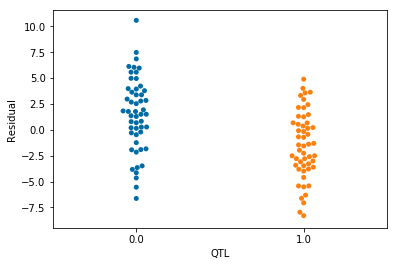

In [202]:
sns.swarmplot(x='QTL',y='Residual',data=dgg);

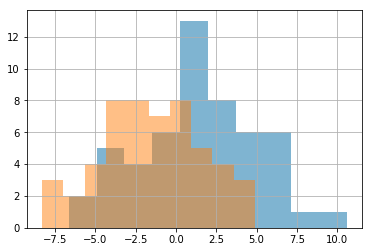

In [201]:
dgg.groupby('QTL').Residual.hist(alpha=0.5);

In [198]:
dgg.to_csv('/Users/croth/Desktop/CRYPTO_QTL/FILES/Capsule_Phenotypes.csv',index=True)

In [ ]:
pval_df.head()

In [ ]:
pval_df[['Chrom','Pos','Residual']
       ].to_csv('/Users/croth/Desktop/CRYPTO_QTL/FILES/Capsule_Pval.csv',
               index=True)

In [ ]:
dgg['Mito'] = [float(a) for a in median_mito[dgg.index].T.values]
dgg['QTL'] = dgg['QTL'].apply(float)

In [ ]:
dgg.head()

In [ ]:
sns.lmplot(x='QTL',y='Residual',hue='Mito',data=dgg)

In [ ]:
median_mito.to_csv('../../FILES/Cdx-mitochondiral-median.csv')

In [ ]:
residual_threshold

In [ ]:
ssa837[y].values

In [ ]:
MelQTL.index = MelQTL.strain

In [ ]:
MelQTL.head()

In [ ]:
dgg['Mel'] = MelQTL.T[dgg.index].T['MC']

In [ ]:
plt.plot(np.argsort(dgg.Mel.values),np.argsort(dgg.Residual.values),'.');

In [ ]:
plt.plot(dgg[(dgg.QTL==0)].Residual,dgg[(dgg.QTL==0)].Mel,'o',color='tab:blue')
plt.plot(dgg[(dgg.QTL==1)].Residual,dgg[(dgg.QTL==1)].Mel,'o',color='tab:orange');

In [ ]:
pval_df[(pval_df.Chrom=='Chr14') & (pval_df.Residual>=residual_threshold) & 
        (pval_df.Pos>=ci95_res[0]) & (pval_df.Pos<=ci95_res[1])].shape

In [ ]:
minpos = pval_df[(pval_df.Chrom=='Chr14') & (pval_df.Residual>=residual_threshold)].Pos.min()
minpos

In [ ]:
maxpos = pval_df[(pval_df.Chrom=='Chr14') & (pval_df.Residual>=residual_threshold)].Pos.max()
maxpos

In [ ]:
left_pos = gv[(gv.Block==gv[(gv.Chrom=='Chr14') & (gv.Pos==minpos)].Block.min())].Pos.min()

In [ ]:
right_pos = gv[(gv.Block==gv[(gv.Chrom=='Chr14') & (gv.Pos==maxpos)].Block.min())].Pos.max()

In [ ]:
chr14_genes = gff[(gff.contig=='Chr14') & (gff.end > left_pos) & (gff.start < right_pos) & (gff.type=='gene')]

In [ ]:
chr14_genes.head()

In [ ]:
chr14_genes.shape

In [ ]:
genes = pd.read_csv('../../FILES/XL280_431_gene_analysis.csv.gz')

In [ ]:
ch14_gene_info = chr14_genes.merge(genes[(genes.chrom=='Chr14')])

In [ ]:
chr14_genes[~(chr14_genes.gene.isin(ch14_gene_info.gene))]

In [ ]:
ch14_gene_info[(ch14_gene_info.missense!=0)][['gene','start','end','strand','phase',
                'attribute','description','nonsense','missense'
                                ]].to_csv('../../FILES/Chr14_genes_with_changes.csv')

In [ ]:
#dggp.reset_index(inplace=True)

In [ ]:
chr14_df = dggp.copy()
chr14_df.columns = ['strain'] + chr14_df.columns[1:].tolist()

In [ ]:
melvr = MelQTL.merge(chr14_df)

In [ ]:
melvr.head()

In [ ]:
melvr[(melvr.strain=='SS-A837')]

In [ ]:
melvr.to_csv('../../FILES/Cdx_capsule_data.csv')

In [ ]:
plt.hist(melvr[(melvr.QTL==0)].Cell,
         color='tab:blue',alpha=0.7,label='XL280');
plt.hist(melvr[(melvr.QTL==1)].Cell,
         color='tab:orange',alpha=0.7,label='431');
plt.ylabel('Number of Segregants');plt.xlabel('Capsule (Full) Diameter')
plt.vlines(melvr[(melvr.strain=='SS-A837')].Cell,0,8,
           color='tab:orange');
plt.vlines(melvr[(melvr.strain.isin(['XL280a','XL280alpha']))].Cell,0,8,
           color='tab:blue',linestyles=['-','--']);

In [ ]:
plt.hist(melvr[(melvr.QTL==0)].Capsule_diameter,
         color='tab:blue',alpha=0.7,label='XL280');
plt.hist(melvr[(melvr.QTL==1)].Capsule_diameter,
         color='tab:orange',alpha=0.7,label='431');
plt.ylabel('Number of Segregants');plt.xlabel('Capsule (Full) Diameter')
plt.vlines(melvr[(melvr.strain=='SS-A837')].Capsule_diameter,0,8,
           color='tab:orange');
plt.vlines(melvr[(melvr.strain.isin(['XL280a','XL280alpha']))].Capsule_diameter,0,8,
           color='tab:blue',linestyles=['-','--']);

In [ ]:
plt.hist(melvr[(melvr.QTL==0)].Residual,
         color='tab:blue',alpha=0.7,label='XL280');
plt.hist(melvr[(melvr.QTL==1)].Residual,
         color='tab:orange',alpha=0.7,label='431');
plt.ylabel('Number of Segregants');plt.xlabel('Residuals')
plt.vlines(melvr[(melvr.strain=='SS-A837')].Residual,0,8,
           color='tab:orange');
plt.vlines(melvr[(melvr.strain.isin(['XL280a','XL280alpha']))].Residual,0,8,
           color='tab:blue',linestyles=['-','--']);

In [ ]:
plt.hist(melvr[(melvr.QTL==0)].Cell_Residual,
         color='tab:blue',alpha=0.7,label='XL280');
plt.hist(melvr[(melvr.QTL==1)].Cell_Residual,
         color='tab:orange',alpha=0.7,label='431');
plt.ylabel('Number of Segregants');plt.xlabel('Residuals')
plt.vlines(melvr[(melvr.strain=='SS-A837')].Cell_Residual,0,8,
           color='tab:orange');
plt.vlines(melvr[(melvr.strain.isin(['XL280a','XL280alpha']))].Cell_Residual,0,8,
           color='tab:blue',linestyles=['-','--']);

In [ ]:
plt.plot(melvr[(melvr.QTL==0)].Residual,
         melvr[(melvr.QTL==0)].MC,
         'o',color='tab:blue',alpha=0.7,label='XL280');
plt.plot(melvr[(melvr.QTL==1)].Residual,
         melvr[(melvr.QTL==1)].MC,
         'o',color='tab:orange',alpha=0.7,label='431');
plt.legend();
plt.ylabel('Mean Intensity\n');
plt.xlabel('Residuals (Annulus Diameter ~ Capsule Diameter)');

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(5,7),sharex=True,sharey=True)
plt.sca(ax[0])
y1 = 'Capsule_diameter'
x = 'Cell_and_Capsule_diameter'
sns.regplot(x=x,y=y1,
           data=melvr,order=1,
           line_kws={'color':'red','alpha':.5}, 
           scatter_kws={'color':'k','alpha':0.5});
plt.xlabel(' ')
plt.ylabel('Diameter of Capsule',fontsize=14)

plt.sca(ax[1])
y2 = 'Cell_diameter'
sns.regplot(x=x,y=y2,
           data=dgg,order=1,
           line_kws={'color':'red','alpha':.5}, 
           scatter_kws={'color':'k','alpha':0.5});
plt.subplots_adjust(hspace=0.1)
plt.xlabel('Diameter of Cell and Capsule',fontsize=14)
plt.ylabel('Diameter of Cell',fontsize=14);
axes = fig.add_axes([1.1,0.3,0.6,0.4])
plt.sca(axes)
#plt.plot(dggp.Cell_Residual,dggp.Residual,'r.');
_431res = melvr[(melvr.QTL==1)]
_xlres = melvr[(melvr.QTL==0)]
plt.plot(_431res.Cell_Residual,_431res.Residual,
         'o',color='tab:orange',alpha=0.5)
plt.plot(_xlres.Cell_Residual,_xlres.Residual,
         'o',color='tab:blue',alpha=0.5);
plt.title('Residuals',fontsize=14)
plt.xlabel('Diameter of Cell',fontsize=14);
plt.ylabel('Diameter of Capsule',fontsize=14);
plt.savefig('../../FIGURES/Cdx_Cell_Capsual_Regression.png',
            dpi=100,bbox_inches='tight');